In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load grayscale experiment data
gray_data = pd.read_csv('Gray_samedifference/gray_fixeddifference2.csv')

# Load color experiment data
color_data = pd.read_csv('Color_samedifference/color_fixeddifference2.csv')


In [3]:
# Display the first few rows of each dataset to understand their structure
print(gray_data.head())
print(color_data.head())

# Remove unnamed columns
gray_data = gray_data.loc[:, ~gray_data.columns.str.contains('^Unnamed')]
color_data = color_data.loc[:, ~color_data.columns.str.contains('^Unnamed')]

# Drop rows with missing values
gray_data = gray_data.dropna()
color_data = color_data.dropna()

# Display the cleaned data
print(gray_data.head())
print(color_data.head())

# Check for missing values to confirm cleaning
print(gray_data.isnull().sum())
print(color_data.isnull().sum())


       Lab (g1)         RGB (g1)  Actual Luminance (g1)      Lab (g2)  \
0  (52.0, 0, 0)  (123, 123, 123)                   48.0  (83.0, 0, 0)   
1  (52.0, 0, 0)  (123, 123, 123)                   48.0  (83.0, 0, 0)   
2  (52.0, 0, 0)  (123, 123, 123)                   48.0  (83.0, 0, 0)   
3           NaN              NaN                    NaN           NaN   
4  (52.0, 0, 0)  (123, 123, 123)                   48.0  (83.0, 0, 0)   

          RGB (g2)  Actual Luminance (g2)  Final Angular Velocity  
0  (206, 206, 206)                  199.0                     0.6  
1  (206, 206, 206)                  199.0                     0.5  
2  (206, 206, 206)                  199.0                     0.7  
3              NaN                    NaN                     NaN  
4  (206, 206, 206)                  199.0                     0.6  
   L value (g1)  Actual Luminance (g1)        RGB (g1)  \
0     48.424603                   48.0     (0, 141, 0)   
1     58.391573                   48.

In [4]:
# Basic statistics for each dataset
print(gray_data.describe())
print(color_data.describe())

# Calculate mean and standard deviation of angular velocity
gray_avg_speed = gray_data['Final Angular Velocity'].mean()
color_avg_speed = color_data['Final Angular Velocity'].mean()

gray_std_speed = gray_data['Final Angular Velocity'].std()
color_std_speed = color_data['Final Angular Velocity'].std()

print(f"Gray - Avg Speed: {gray_avg_speed}, Std Dev: {gray_std_speed}")
print(f"Color - Avg Speed: {color_avg_speed}, Std Dev: {color_std_speed}")


       Actual Luminance (g1)  Actual Luminance (g2)  Final Angular Velocity
count                   55.0                   55.0               55.000000
mean                    48.0                  199.0                0.560000
std                      0.0                    0.0                0.190127
min                     48.0                  199.0                0.000000
25%                     48.0                  199.0                0.400000
50%                     48.0                  199.0                0.600000
75%                     48.0                  199.0                0.700000
max                     48.0                  199.0                0.900000
       L value (g1)  Actual Luminance (g1)  L value (g2)  \
count    222.000000                  222.0    222.000000   
mean      51.269457                   48.0     86.933283   
std        4.541907                    0.0      6.485805   
min       46.368110                   48.0     81.130137   
25%       48.424

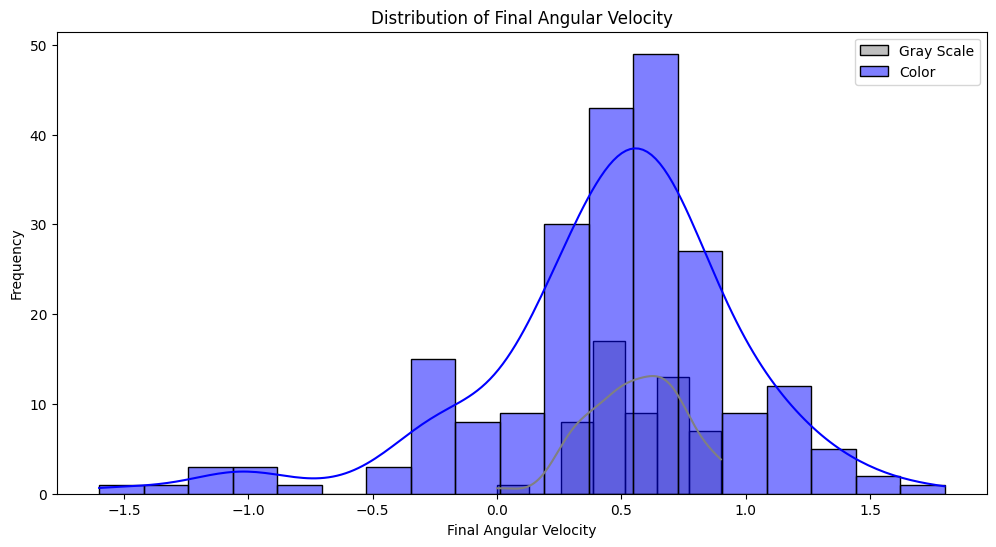

In [5]:
# Compare the distribution of angular velocity for grayscale and color experiments
plt.figure(figsize=(12, 6))
sns.histplot(gray_data['Final Angular Velocity'], color='gray', label='Gray Scale', kde=True)
sns.histplot(color_data['Final Angular Velocity'], color='blue', label='Color', kde=True)
plt.legend()
plt.title('Distribution of Final Angular Velocity')
plt.xlabel('Final Angular Velocity')
plt.ylabel('Frequency')
plt.show()

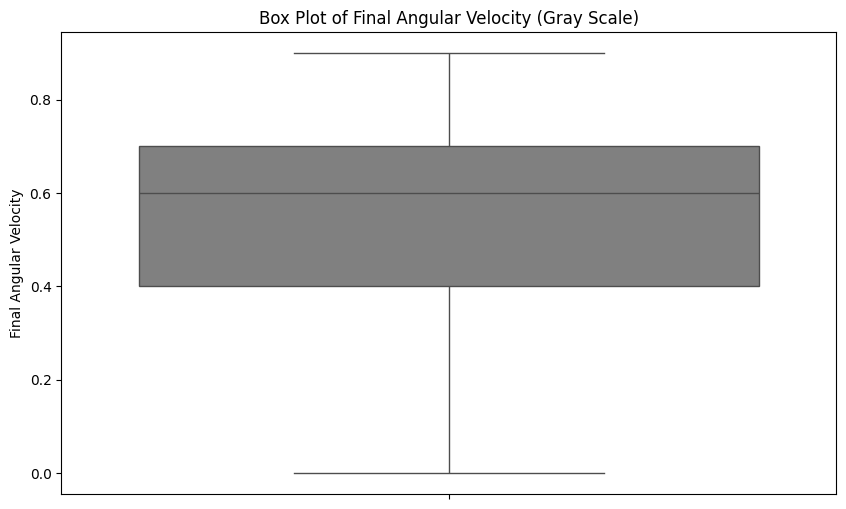

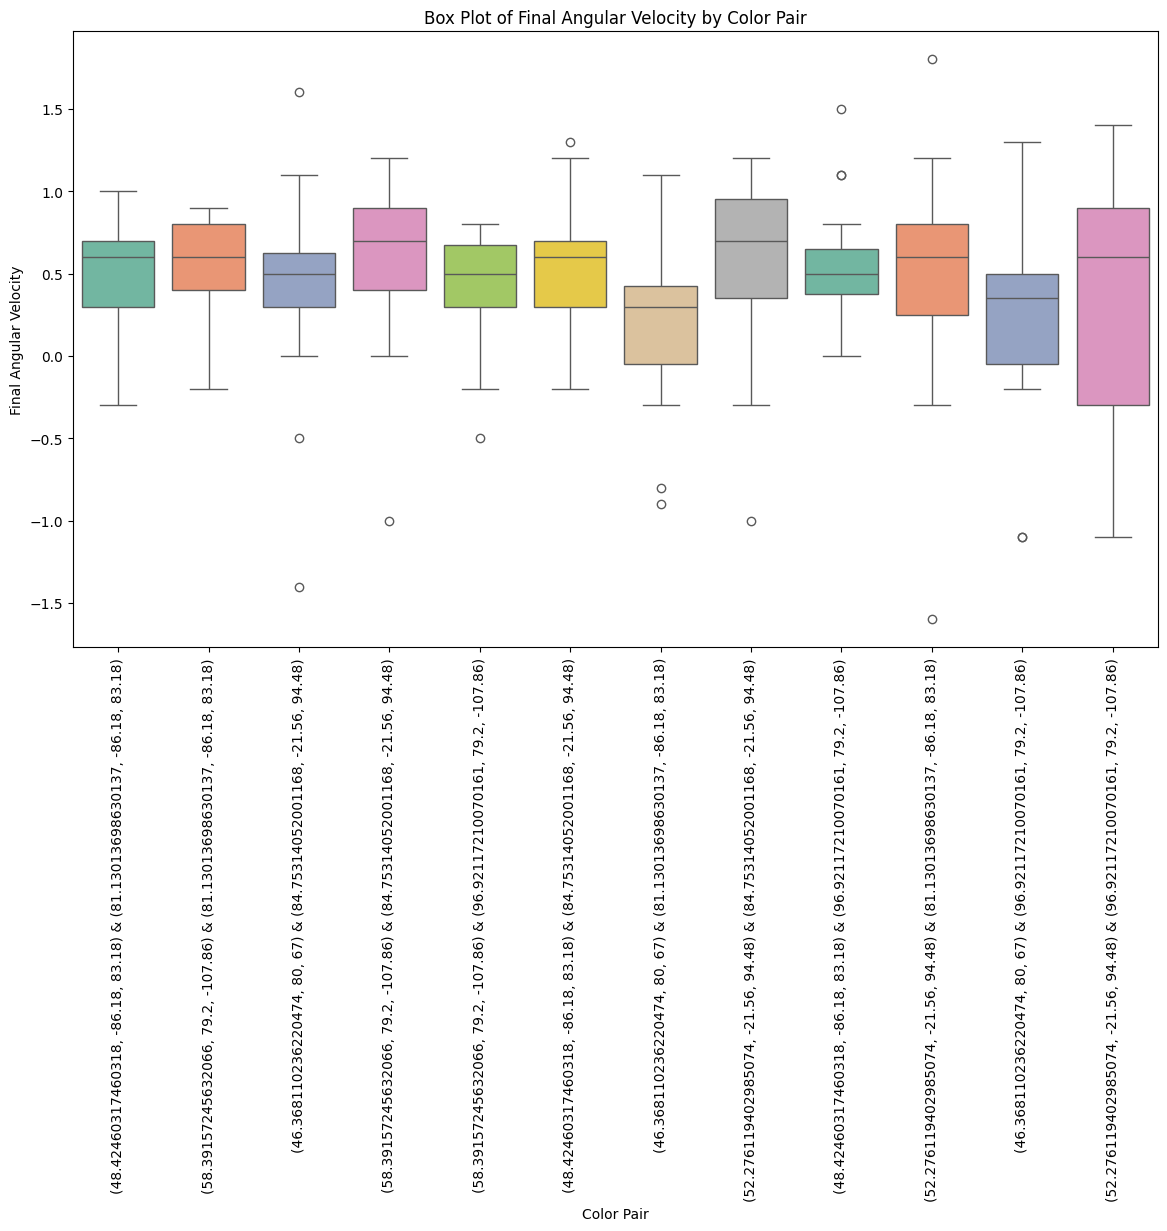

In [6]:





# If necessary, fill or drop missing values
gray_data = gray_data.dropna()
color_data = color_data.dropna()

# Create a new column to identify color pairs
color_data['Color Pair'] = color_data.apply(lambda row: f"{row['Lab (g1)']} & {row['Lab (g2)']}", axis=1)


# Box Plot for Gray Version
plt.figure(figsize=(10, 6))
sns.boxplot(data=gray_data, y='Final Angular Velocity', color='gray')
plt.title('Box Plot of Final Angular Velocity (Gray Scale)')
plt.ylabel('Final Angular Velocity')
plt.show()

# Box Plot for Color Version Grouped by the Same Type of Color Pair
plt.figure(figsize=(14, 8))
sns.boxplot(data=color_data, x='Color Pair', y='Final Angular Velocity', hue='Color Pair', palette='Set2', legend=False)
plt.title('Box Plot of Final Angular Velocity by Color Pair')
plt.xlabel('Color Pair')
plt.ylabel('Final Angular Velocity')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()


ANOVA

Group classification

In [7]:
# Combine 'Lab (g1)' and 'Lab (g2)' into a single column for grouping
color_data['Color Pair'] = color_data['Lab (g1)'].astype(str) + ' & ' + color_data['Lab (g2)'].astype(str)

# Display the first few rows to verify the new column
color_data.head()


,L value (g1),Actual Luminance (g1),RGB (g1),Lab (g1),L value (g2),Actual Luminance (g2),RGB (g2),Lab (g2),Final Angular Velocity,Color Pair
0,48.424603,48.0,"(0, 141, 0)","(48.42460317460318, -86.18, 83.18)",81.130137,199.0,"(0, 235, 0)","(81.13013698630137, -86.18, 83.18)",0.6,"(48.42460317460318, -86.18, 83.18) & (81.13013..."
1,58.391573,48.0,"(143, 88, 255)","(58.39157245632066, 79.2, -107.86)",81.130137,199.0,"(0, 235, 0)","(81.13013698630137, -86.18, 83.18)",0.5,"(58.39157245632066, 79.2, -107.86) & (81.13013..."
2,46.368110,48.0,"(231, 0, 0)","(46.368110236220474, 80, 67)",84.753141,199.0,"(216, 219, 0)","(84.75314052001168, -21.56, 94.48)",0.4,"(46.368110236220474, 80, 67) & (84.75314052001..."
3,58.391573,48.0,"(143, 88, 255)","(58.39157245632066, 79.2, -107.86)",84.753141,199.0,"(216, 219, 0)","(84.75314052001168, -21.56, 94.48)",1.1,"(58.39157245632066, 79.2, -107.86) & (84.75314..."
4,58.391573,48.0,"(143, 88, 255)","(58.39157245632066, 79.2, -107.86)",96.921172,199.0,"(255, 195, 255)","(96.92117210070161, 79.2, -107.86)",0.7,"(58.39157245632066, 79.2, -107.86) & (96.92117..."


/var/folders/9g/k6_r84gs7sx6z9z0d3_1j6sr0000gn/T/ipykernel_63560/301224335.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=color_data, x='Color Pair', y='Final Angular Velocity', palette='Set2')


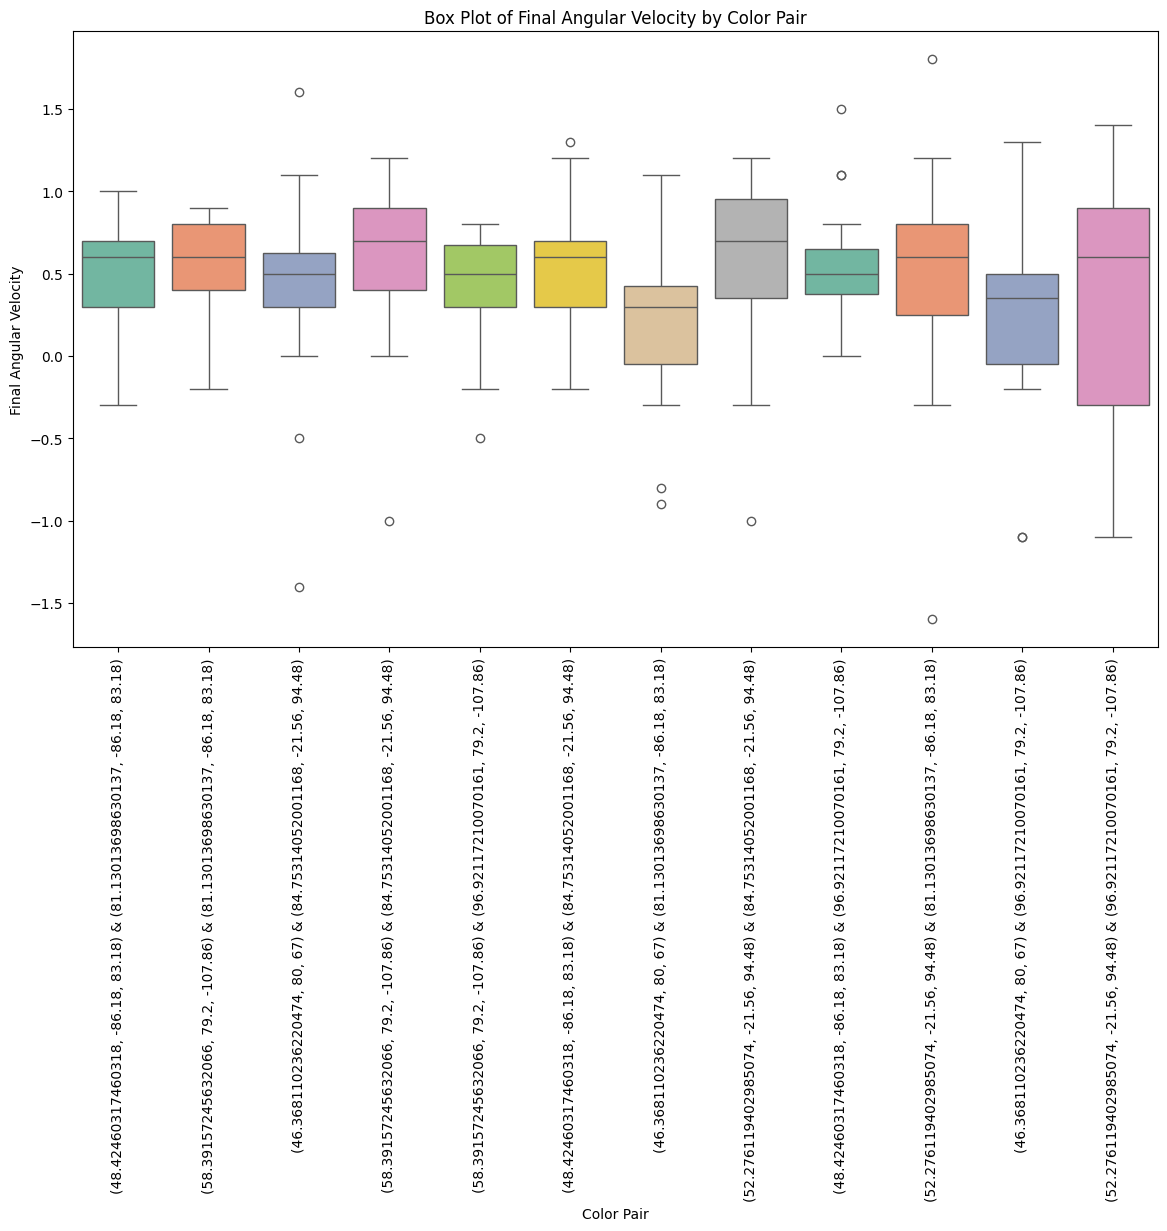

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot for Color Version Grouped by Color Pair
plt.figure(figsize=(14, 8))
sns.boxplot(data=color_data, x='Color Pair', y='Final Angular Velocity', palette='Set2')
plt.title('Box Plot of Final Angular Velocity by Color Pair')
plt.xlabel('Color Pair')
plt.ylabel('Final Angular Velocity')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()


In [9]:
# Function to ensure consistent labeling for color pairs
def sort_lab_pairs(row):
    g1 = row['Lab (g1)']
    g2 = row['Lab (g2)']
    return ' & '.join(sorted([str(g1), str(g2)]))

# Apply the function to create the new 'Color Pair' column
color_data['Color Pair'] = color_data.apply(sort_lab_pairs, axis=1)

# Display the first few rows to verify the new column
color_data


,L value (g1),Actual Luminance (g1),RGB (g1),Lab (g1),L value (g2),Actual Luminance (g2),RGB (g2),Lab (g2),Final Angular Velocity,Color Pair
0,48.424603,48.0,"(0, 141, 0)","(48.42460317460318, -86.18, 83.18)",81.130137,199.0,"(0, 235, 0)","(81.13013698630137, -86.18, 83.18)",0.6,"(48.42460317460318, -86.18, 83.18) & (81.13013..."
1,58.391573,48.0,"(143, 88, 255)","(58.39157245632066, 79.2, -107.86)",81.130137,199.0,"(0, 235, 0)","(81.13013698630137, -86.18, 83.18)",0.5,"(58.39157245632066, 79.2, -107.86) & (81.13013..."
2,46.368110,48.0,"(231, 0, 0)","(46.368110236220474, 80, 67)",84.753141,199.0,"(216, 219, 0)","(84.75314052001168, -21.56, 94.48)",0.4,"(46.368110236220474, 80, 67) & (84.75314052001..."
3,58.391573,48.0,"(143, 88, 255)","(58.39157245632066, 79.2, -107.86)",84.753141,199.0,"(216, 219, 0)","(84.75314052001168, -21.56, 94.48)",1.1,"(58.39157245632066, 79.2, -107.86) & (84.75314..."
4,58.391573,48.0,"(143, 88, 255)","(58.39157245632066, 79.2, -107.86)",96.921172,199.0,"(255, 195, 255)","(96.92117210070161, 79.2, -107.86)",0.7,"(58.39157245632066, 79.2, -107.86) & (96.92117..."
...,...,...,...,...,...,...,...,...,...,...
517,46.368110,48.0,"(231, 0, 0)","(46.368110236220474, 80, 67)",81.130137,199.0,"(0, 235, 0)","(81.13013698630137, -86.18, 83.18)",-0.9,"(46.368110236220474, 80, 67) & (81.13013698630..."
520,58.391572,48.0,"(143, 88, 255)","(58.39157245632066, 79.2, -107.86)",84.753141,199.0,"(216, 219, 0)","(84.75314052001168, -21.56, 94.48)",0.0,"(58.39157245632066, 79.2, -107.86) & (84.75314..."
523,46.368110,48.0,"(231, 0, 0)","(46.368110236220474, 80, 67)",81.130137,199.0,"(0, 235, 0)","(81.13013698630137, -86.18, 83.18)",-0.8,"(46.368110236220474, 80, 67) & (81.13013698630..."
526,46.368110,48.0,"(231, 0, 0)","(46.368110236220474, 80, 67)",81.130137,199.0,"(0, 235, 0)","(81.13013698630137, -86.18, 83.18)",-0.2,"(46.368110236220474, 80, 67) & (81.13013698630..."


   L value (g1)  Actual Luminance (g1)        RGB (g1)  \
0     48.424603                   48.0     (0, 141, 0)   
1     58.391573                   48.0  (143, 88, 255)   
2     46.368110                   48.0     (231, 0, 0)   
3     58.391573                   48.0  (143, 88, 255)   
4     58.391573                   48.0  (143, 88, 255)   

                             Lab (g1)  L value (g2)  Actual Luminance (g2)  \
0  (48.42460317460318, -86.18, 83.18)     81.130137                  199.0   
1  (58.39157245632066, 79.2, -107.86)     81.130137                  199.0   
2        (46.368110236220474, 80, 67)     84.753141                  199.0   
3  (58.39157245632066, 79.2, -107.86)     84.753141                  199.0   
4  (58.39157245632066, 79.2, -107.86)     96.921172                  199.0   

          RGB (g2)                            Lab (g2)  \
0      (0, 235, 0)  (81.13013698630137, -86.18, 83.18)   
1      (0, 235, 0)  (81.13013698630137, -86.18, 83.18)   
2    (21

/var/folders/9g/k6_r84gs7sx6z9z0d3_1j6sr0000gn/T/ipykernel_63560/3220204415.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=color_data, x='Group', y='Final Angular Velocity', palette='Set2')


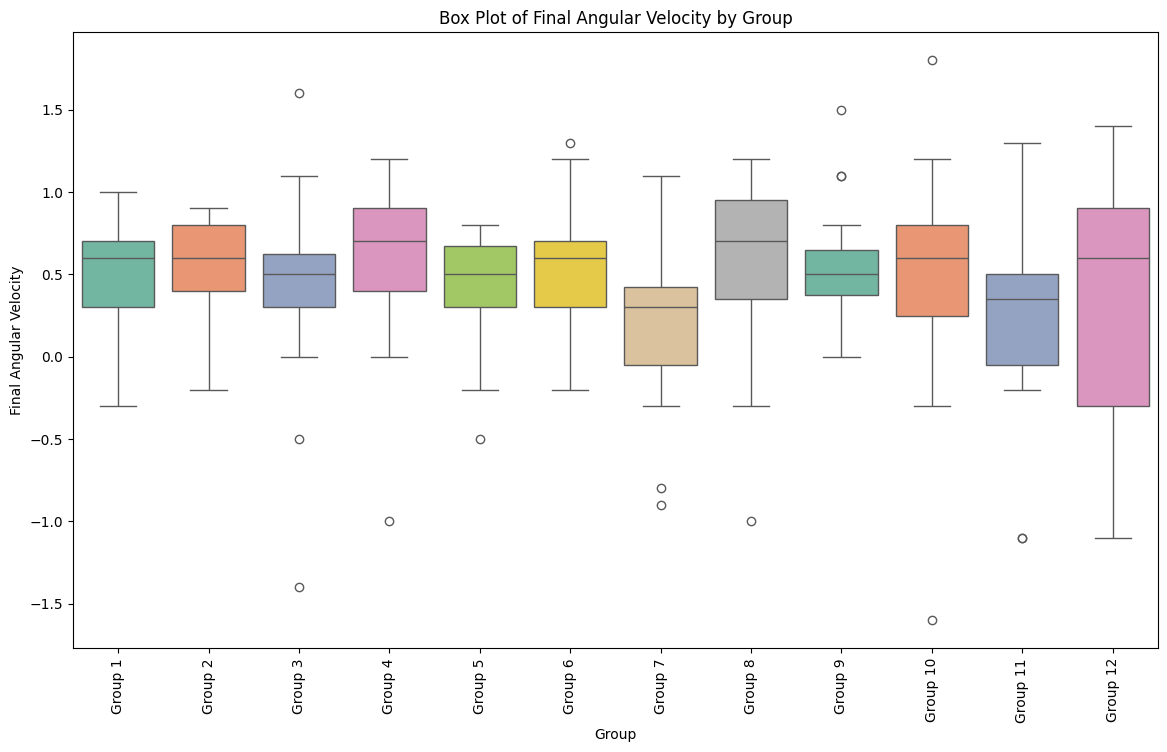

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Combine 'Lab (g1)' and 'Lab (g2)' into a single column for grouping
def sort_lab_pairs(row):
    g1 = row['Lab (g1)']
    g2 = row['Lab (g2)']
    return ' & '.join(sorted([str(g1), str(g2)]))

color_data['Color Pair'] = color_data.apply(sort_lab_pairs, axis=1)

# Create a dictionary to map each unique Color Pair to a group label
unique_color_pairs = color_data['Color Pair'].unique()
group_labels = {pair: f'Group {i+1}' for i, pair in enumerate(unique_color_pairs)}

# Add the Group column to the DataFrame
color_data['Group'] = color_data['Color Pair'].map(group_labels)

# Display the first few rows to verify the new columns
print(color_data.head())

# Group by 'Group' and aggregate the 'Final Angular Velocity'
grouped_data = color_data.groupby('Group')['Final Angular Velocity'].agg(['mean', 'std', 'count']).reset_index()
grouped_data.columns = ['Group', 'Mean Final Angular Velocity', 'Std Dev Final Angular Velocity', 'Count']

# Display the aggregated data
print(grouped_data)

# Box Plot for Color Version Grouped by Group Labels
plt.figure(figsize=(14, 8))
sns.boxplot(data=color_data, x='Group', y='Final Angular Velocity', palette='Set2')
plt.title('Box Plot of Final Angular Velocity by Group')
plt.xlabel('Group')
plt.ylabel('Final Angular Velocity')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()


T test for overall 

In [11]:
from scipy.stats import ttest_ind

# Extract the final angular velocity data for both conditions
color_angular_velocities = color_data['Final Angular Velocity']
gray_angular_velocities = gray_data['Final Angular Velocity']

# Perform the independent t-test
t_stat, p_value = ttest_ind(color_angular_velocities, gray_angular_velocities)

# Display the t-statistic and p-value
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -1.482021424857476
P-value: 0.13947955905094905


In [12]:
# Interpretation based on the p-value
alpha = 0.05  # Common significance level

if p_value < alpha:
    print("The difference in angular velocities between color and gray scale conditions is statistically significant.")
else:
    print("The difference in angular velocities between color and gray scale conditions is not statistically significant.")


The difference in angular velocities between color and gray scale conditions is not statistically significant.


For different groups

In [13]:
import pandas as pd
from scipy.stats import ttest_ind


# Extract the final angular velocity data for the gray scale condition
gray_angular_velocities = gray_data['Final Angular Velocity']

# Group the color data by the 'Group' column
grouped_color_data = color_data.groupby('Group')

# Initialize lists to store the results
groups = []
t_stats = []
p_values = []
significance = []

# Perform the t-test for each group
for group_name, group_data in grouped_color_data:
    color_angular_velocities = group_data['Final Angular Velocity']
    t_stat, p_value = ttest_ind(color_angular_velocities, gray_angular_velocities)
    
    groups.append(group_name)
    t_stats.append(t_stat)
    p_values.append(p_value)
    significance.append('Significant' if p_value < 0.05 else 'Not Significant')

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Group': groups,
    'T-statistic': t_stats,
    'P-value': p_values,
    'Significance': significance
})

# Display the results
print(results_df)


       Group  T-statistic   P-value     Significance
0    Group 1    -1.111895  0.269599  Not Significant
1   Group 10    -1.035835  0.303698  Not Significant
2   Group 11    -3.407670  0.001097      Significant
3   Group 12    -1.037535  0.303273  Not Significant
4    Group 2    -0.296930  0.767399  Not Significant
5    Group 3    -1.608785  0.111980  Not Significant
6    Group 4     0.303801  0.762156  Not Significant
7    Group 5    -2.169575  0.033388      Significant
8    Group 6    -0.995418  0.322692  Not Significant
9    Group 7    -4.557864  0.000022      Significant
10   Group 8    -0.024781  0.980298  Not Significant
11   Group 9     0.304086  0.761978  Not Significant


       Group  T-statistic   P-value     Significance
0    Group 1    -1.111895  0.269599  Not Significant
1   Group 10    -1.035835  0.303698  Not Significant
2   Group 11    -3.407670  0.001097      Significant
3   Group 12    -1.037535  0.303273  Not Significant
4    Group 2    -0.296930  0.767399  Not Significant
5    Group 3    -1.608785  0.111980  Not Significant
6    Group 4     0.303801  0.762156  Not Significant
7    Group 5    -2.169575  0.033388      Significant
8    Group 6    -0.995418  0.322692  Not Significant
9    Group 7    -4.557864  0.000022      Significant
10   Group 8    -0.024781  0.980298  Not Significant
11   Group 9     0.304086  0.761978  Not Significant


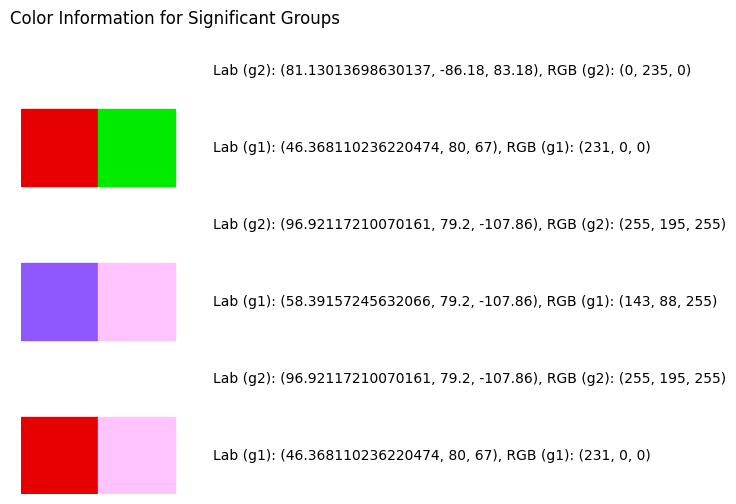

In [14]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt


# Extract the final angular velocity data for the gray scale condition
gray_angular_velocities = gray_data['Final Angular Velocity']

# Group the color data by the 'Group' column
grouped_color_data = color_data.groupby('Group')

# Initialize lists to store the results
groups = []
t_stats = []
p_values = []
significance = []

# Perform the t-test for each group
for group_name, group_data in grouped_color_data:
    color_angular_velocities = group_data['Final Angular Velocity']
    t_stat, p_value = ttest_ind(color_angular_velocities, gray_angular_velocities)
    
    groups.append(group_name)
    t_stats.append(t_stat)
    p_values.append(p_value)
    significance.append('Significant' if p_value < 0.05 else 'Not Significant')

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Group': groups,
    'T-statistic': t_stats,
    'P-value': p_values,
    'Significance': significance
})

# Display the results
print(results_df)

# Filter for significant groups
significant_groups = results_df[results_df['Significance'] == 'Significant']

# Visualize the color information for significant groups as squares
fig, ax = plt.subplots(figsize=(10, 2 * len(significant_groups)))
for i, group_name in enumerate(significant_groups['Group']):
    group_color_data = color_data[color_data['Group'] == group_name][['Lab (g1)', 'RGB (g1)', 'Lab (g2)', 'RGB (g2)']].drop_duplicates().reset_index(drop=True)
    for j, row in group_color_data.iterrows():
        g1_color = eval(row['RGB (g1)'])
        g2_color = eval(row['RGB (g2)'])
        
        # Plot the squares
        ax.add_patch(plt.Rectangle((0, i * 2), 1, 1, color=[c / 255 for c in g1_color]))
        ax.add_patch(plt.Rectangle((1, i * 2), 1, 1, color=[c / 255 for c in g2_color]))
        
        # Annotate with the color information
        ax.text(2.5, i * 2 + 0.5, f"Lab (g1): {row['Lab (g1)']}, RGB (g1): {row['RGB (g1)']}", va='center')
        ax.text(2.5, i * 2 + 1.5, f"Lab (g2): {row['Lab (g2)']}, RGB (g2): {row['RGB (g2)']}", va='center')

# Adjust plot settings
ax.set_xlim(0, 4)
ax.set_ylim(0, 2 * len(significant_groups))
ax.set_aspect('equal')
ax.axis('off')
plt.title('Color Information for Significant Groups')
plt.show()


In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def draw_pattern(ax, xc, yc, r_max, clockwise, decay_factor, g1, g2, color1, color2):
    # Define the color order for clockwise and anti-clockwise rotations
    if clockwise:
        vals_t = [color1, g1, color2, g2]
    else:
        vals_t = [g2, color2, g1, color1]

    num_ts = 96
    num_rs = 8

    # Calculate the proportional widths of each ring
    ring_widths = []
    total_width = 0
    r = r_max
    for r_idx in range(num_rs):
        dr = r * (1 - decay_factor)
        ring_widths.append(dr)
        total_width += dr
        r *= decay_factor

    # Adjust the widths so they sum up to r_max
    ring_widths = [rw * (r_max / total_width) for rw in ring_widths]

    r = r_max
    for r_idx in range(num_rs):
        t_val_pos = r_idx % 4
        dr = ring_widths[r_idx]

        for t_idx in range(num_ts):
            theta1 = t_idx * 2 * np.pi / num_ts
            theta2 = (t_idx + 1) * 2 * np.pi / num_ts

            wedge = patches.Wedge(
                (xc, yc), r, np.degrees(theta1), np.degrees(theta2),
                facecolor=[v / 255 for v in vals_t[t_val_pos]], width=dr
            )

            ax.add_patch(wedge)
            t_val_pos = (t_val_pos + 1) % 4

        r -= dr

def visualize_significant_pairs(significant_groups, color_data):
    fig, ax = plt.subplots(figsize=(10, 2 * len(significant_groups)))
    bkg_val = 128
    ax.set_aspect('equal')
    ax.set_facecolor([bkg_val / 255] * 3)
    is_clockwise = True
    decay_factor = 0.8
    r_max = 1  # Adjust radius for better visualization

    for i, group_name in enumerate(significant_groups['Group']):
        group_color_data = color_data[color_data['Group'] == group_name][['Lab (g1)', 'RGB (g1)', 'Lab (g2)', 'RGB (g2)']].drop_duplicates().reset_index(drop=True)
        
        for j, row in group_color_data.iterrows():
            g1_color = eval(row['RGB (g1)'])
            g2_color = eval(row['RGB (g2)'])
            color1 = (0, 0, 0)  # Black
            color2 = (255, 255, 255)  # White
            
            # Draw the circle pattern
            draw_pattern(ax, 5, i * 2 + 1, r_max, is_clockwise, decay_factor, g1_color, g2_color, color1, color2)
    
    plt.xlim(0, 10)
    plt.ylim(0, 2 * len(significant_groups))
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title('Color Information and Patterns for Significant Groups')
    plt.show()

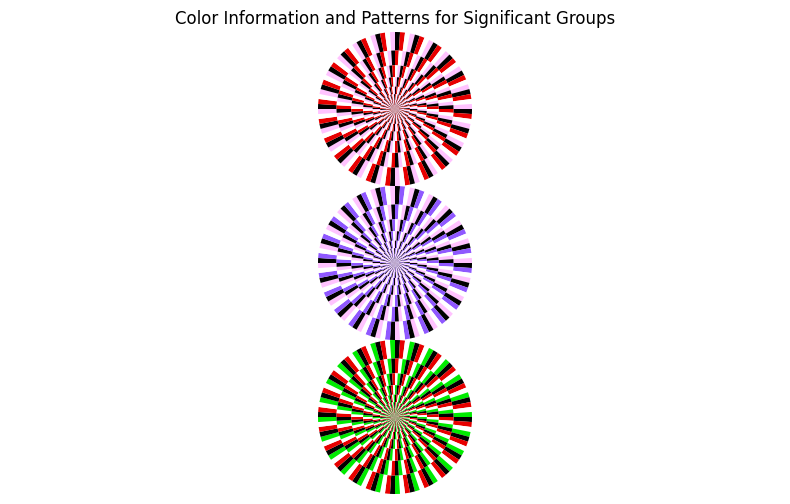

In [16]:
# Assuming `results_df` and `color_data` DataFrames are already defined and contain the necessary data.
# Filter for significant groups
significant_groups = results_df[results_df['Significance'] == 'Significant']

# Call the function to visualize the significant pairs
visualize_significant_pairs(significant_groups, color_data)